# Chunking Techniques

The choice of a chunk strategy may depend on the following

1. Document type
2. Complexity of the query being made
3. Time and computation constraints
4. Speed vs Accuracy balance

In [ ]:
!pipenv install nltk

In [2]:
from nltk import download

download("punkt_tab")

[nltk_data] Downloading package punkt_tab to /home/abhi/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [31]:
context = """
Nosy Komba (Malagasy pronunciation: [nusʲ ˈkuᵐba]; lit. 'island of lemurs'), also known as Nosy Ambariovato, is a small volcanic island in Madagascar, situated between the island of Nosy Be and the northwestern coast of the main island of Madagascar. Roughly circular, it rises sharply towards a plateau and the summit of Antaninaombi at the center of the island. Administered as an arrondissement of the unitary commune and district of Nosy-Be within Diana Region, the island is divided into five fokontany (villages), with Ampangorina as the main village and administrative center. The population is mainly restricted to the northern half of the island. The economy is reliant on tourism and handicrafts, supplemented by a wide range of agricultural products. Hotels and guest houses support tourists to the island, mainly on excursions from Nosy Be.

The lowlands of the island are divided between secondary forest and a patchwork of farmland and plantations (notably including shade-grown coffee), while the highlands are mainly scrubland, with a bamboo forest in the northern portions. The island hosts a diverse range of reptiles and amphibians, although this has been reduced by deforestation. The island is known for its black lemurs, causing it to attract significant ecotourism. Heavily deforested during the 19th and 20th centuries, the island has only small pockets of old-growth forest remaining in remote areas. Although the island hosts a traditionally protected forest and an arboretum established in the colonial era, protection for the latter is essentially unenforced, and illegal logging continues.

During the early 19th century, the region was heavily settled by Sakalava refugees and their slaves fleeing the hegemony of the Merina Kingdom. France gained control of the island in 1840; it was converted to a logistic center for the import of indentured servants and local slaves, and later a sanatorium retreat for colonists.

Geography
View of houses in a village with a hilly jungle background
A village on Nosy Komba
Nosy Komba (from Malagasy, lit. 'island of lemurs'), also known as Nosy Ambariovato, is a small circular volcanic island 27.9 km2 (10.8 sq mi) in area. It is located 3 km (2 mi) south of the larger island of Nosy Be and 4 km (2.5 mi) north of Doany, the nearest point of the main island of Madagascar. Nosy Komba's lowlands are largely divided between farmland and secondary forests, while scrub predominates in the highlands.[1][2] All sides of the island steeply rise towards the central plateau. Antaninaombi, the summit of the island, reaches a height of 622 m (2,041 ft). Nearby is a slightly lower secondary summit, Ankisoabé.[2][3][4]

The island has high precipitation for much of the year, but experiences a dry season from June to September. Weather data from nearby Nosy Be gives a mean annual temperature of around 26 °C (79 °F).[2]

The island formed during or shortly after the end of the Cretaceous period 66 million years ago, as Madagascar separated from the continent of Africa. The landmass consists of an igneous intrusion of gabbro and nepheline surrounded by schist.[2][5] One or more periods of volcanic activity emerged within the Nosy Be volcanic area during the Miocene, with Nosy Komba's igneous rock estimated at around 10 million years old.[6] During the Last Glacial Period, the island was connected to other nearby islands, including Nosy Be. Around 8,000 years ago, rising sea levels cut it off from the main island of Madagascar.[3]

History
In the early 19th century, the Merina Kingdom gained hegemony over the Sakalava-inhabited northwestern coast of Madagascar. Merina persecution motivated several revolts and the migration of 15,000 people, mainly Sakalava and their slaves, to Nosy Be and Nosy Komba. In 1837, Tsiomeko, the queen of Boina, fled to Nosy Komba. That year, Merina forces attempted to seize the island, but were repulsed.[7][8][9]

Expanding French influence over the northwest coast of Madagascar forced Tsiomeko and the Merina to cede a portion of the coast to France in July 1840, including both islands. Three years later, the islands were placed under a local colonial administration named Nosy-Bé et Dépendances (lit. 'Nosy Be and Dependencies'). This was governed from the colony of Réunion.[7][8][10] Nosy Be and Nosy Komba became centers for the colonial labor force, drawn from engagés (indentured servants) recruited from the mainland and local slaves. Engagés were often slaves whose freedom was purchased by Europeans, but who were then immediately engaged as indentured servants on 14-year contracts. Initially, the Malagasy were allowed to keep their slaves and rent them to settlers. However, slavery was abolished in the French colonies by an 1848 decree [fr]. This emancipation was welcomed by the French officials and settlers, who sought to increase the supply of labor, but it breached the earlier agreement with the Malagasy elites and led to slaveowners fleeing to Madagascar with their slaves and launching slave raids on Nosy Be. After the raids were repelled, the freedom of the remaining slaves was purchased. Since the emancipation decree did not apply to nearby islands and the main island of Madagascar, settlers continued to rent slaves from Malagasy elites, shipping them as engagés (alongside others recruited in mainland East Africa) to Mayotte and Réunion. A large hangar housing over 800 workers was constructed on Nosy Komba by the late 1850s and was used to screen newly recruited laborers from Mozambique; many died soon after reaching the island.[11][12]
"""

#### Sentence Splitter

In [32]:
from nltk import sent_tokenize

In [33]:
sentences = sent_tokenize(text=context)

In [34]:
len(sentences), sentences[:3]

(45,
 ['\nNosy Komba (Malagasy pronunciation: [nusʲ ˈkuᵐba]; lit.',
  "'island of lemurs'), also known as Nosy Ambariovato, is a small volcanic island in Madagascar, situated between the island of Nosy Be and the northwestern coast of the main island of Madagascar.",
  'Roughly circular, it rises sharply towards a plateau and the summit of Antaninaombi at the center of the island.'])

#### Length Based

This can be token based or character based.
Token based is useful when working with similar models, character based is more consistent across different types of text.

In [ ]:
!pipenv install langchain langchain_text_splitters 

In [41]:
from langchain_text_splitters import CharacterTextSplitter

text_splitter = CharacterTextSplitter.from_tiktoken_encoder(
    encoding_name="cl100k_base", chunk_size=210, chunk_overlap=50
)
texts = text_splitter.split_text(context)
len(texts), texts[0]

(7,
 "Nosy Komba (Malagasy pronunciation: [nusʲ ˈkuᵐba]; lit.\u2009'island of lemurs'), also known as Nosy Ambariovato, is a small volcanic island in Madagascar, situated between the island of Nosy Be and the northwestern coast of the main island of Madagascar. Roughly circular, it rises sharply towards a plateau and the summit of Antaninaombi at the center of the island. Administered as an arrondissement of the unitary commune and district of Nosy-Be within Diana Region, the island is divided into five fokontany (villages), with Ampangorina as the main village and administrative center. The population is mainly restricted to the northern half of the island. The economy is reliant on tourism and handicrafts, supplemented by a wide range of agricultural products. Hotels and guest houses support tourists to the island, mainly on excursions from Nosy Be.")

#### Text Structure Based

In [42]:
from langchain_text_splitters import RecursiveCharacterTextSplitter

text_splitter = RecursiveCharacterTextSplitter(chunk_size=100, chunk_overlap=0)
texts = text_splitter.split_text(context)
len(texts), texts[0]

(63,
 "Nosy Komba (Malagasy pronunciation: [nusʲ ˈkuᵐba]; lit.\u2009'island of lemurs'), also known as Nosy")

#### Split by Markdown Headers

When splitting markdown content, we can specify headers to group content by

# 1. Heading 1
some content for test

## 1.1 Heading 1.1
some content for test

## 1.2 Heading 1.2
some content for test

# 2. Heading 2
some content for test

Example of what we want

```md
# 1. Heading 1
some content for test (chunk 1)

# 1. Heading 1
## 1.1 Heading 1.1
some content for test (chunk 2)
```

In [43]:
from langchain_text_splitters import MarkdownHeaderTextSplitter

In [44]:
markdown_document = "# Foo\n\n    ## Bar\n\nHi this is Jim\n\nHi this is Joe\n\n ### Boo \n\n Hi this is Lance \n\n ## Baz\n\n Hi this is Molly"

headers_to_split_on = [
    ("#", "Header 1"),
    ("##", "Header 2"),
    ("###", "Header 3"),
]

markdown_splitter = MarkdownHeaderTextSplitter(headers_to_split_on)
md_header_splits = markdown_splitter.split_text(markdown_document)
md_header_splits

[Document(metadata={'Header 1': 'Foo', 'Header 2': 'Bar'}, page_content='Hi this is Jim  \nHi this is Joe'),
 Document(metadata={'Header 1': 'Foo', 'Header 2': 'Bar', 'Header 3': 'Boo'}, page_content='Hi this is Lance'),
 Document(metadata={'Header 1': 'Foo', 'Header 2': 'Baz'}, page_content='Hi this is Molly')]

In [65]:
print("# Foo\n\n Hi this is Jim \n\n ## Boo \n\n Hi this is Lance \n\n # Baz\n\n Hi this is Molly")

# Foo

 Hi this is Jim 

 ## Boo 

 Hi this is Lance 

 # Baz

 Hi this is Molly


In [64]:
# markdown_document = "# 1.\n\n Heading 1 some content for test ## 1.1\n\n Heading 1.1\n\n some content for test ## 1.2\n\n Heading 1.2\n\n some content for test # 2.\n\n Heading 2\n\n some content for test ## Heading 1.1\n\n some content for test"

markdown_document = "# Foo\n\n Hi this is Jim \n\n ## Boo \n\n Hi this is Lance \n\n # Baz\n\n Hi this is Molly"


headers_to_split_on = [
    ("#", "Header 1"),
    ("##", "Header 2"),
    
]

markdown_splitter = MarkdownHeaderTextSplitter(headers_to_split_on, return_each_line=True)
md_header_splits = markdown_splitter.split_text(markdown_document)
md_header_splits

for split in md_header_splits:
    print(split)
    print("*"*10)

page_content='Hi this is Jim' metadata={'Header 1': 'Foo'}
**********
page_content='Hi this is Lance' metadata={'Header 1': 'Foo', 'Header 2': 'Boo'}
**********
page_content='Hi this is Molly' metadata={'Header 1': 'Baz'}
**********


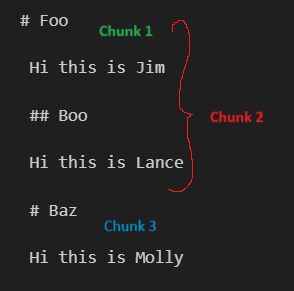

#### Semantic Chunking

In [67]:
!pipenv install langchain_experimental langchain_openai

✔ Success! Locking packages...
⠙ Locking packages...
Building requirements...
Resolving dependencies....
✔ Success! Locking packages...
⠇ Locking packages...
To activate this project's virtualenv, run pipenv shell.
Alternatively, run a command inside the virtualenv with pipenv run.
Installing dependencies from Pipfile.lock (1f8aea)...
All dependencies are now up-to-date!
Installing dependencies from Pipfile.lock (1f8aea)...


In [73]:
from dotenv import load_dotenv
from os import getenv

load_dotenv()

True

In [74]:
from langchain_openai.embeddings import AzureOpenAIEmbeddings

In [75]:
embeddings = AzureOpenAIEmbeddings(model=getenv("AZURE_OPENAI_EMBEDDINGS_DEPLOYMENT_NAME"))

In [76]:
len(embeddings.embed_query("Hi"))

1536

In [77]:
from langchain_experimental.text_splitter import SemanticChunker

In [78]:
text_splitter = SemanticChunker(embeddings)

In [79]:
docs = text_splitter.create_documents(texts=[context])

In [80]:
len(docs)

3

In [82]:
print(docs[0].page_content)


Nosy Komba (Malagasy pronunciation: [nusʲ ˈkuᵐba]; lit. 'island of lemurs'), also known as Nosy Ambariovato, is a small volcanic island in Madagascar, situated between the island of Nosy Be and the northwestern coast of the main island of Madagascar. Roughly circular, it rises sharply towards a plateau and the summit of Antaninaombi at the center of the island. Administered as an arrondissement of the unitary commune and district of Nosy-Be within Diana Region, the island is divided into five fokontany (villages), with Ampangorina as the main village and administrative center. The population is mainly restricted to the northern half of the island.


Percentile split

In [83]:
text_splitter = SemanticChunker(
    embeddings, breakpoint_threshold_type="percentile"
)
docs = text_splitter.create_documents(texts=[context])
print(docs[0].page_content)


Nosy Komba (Malagasy pronunciation: [nusʲ ˈkuᵐba]; lit. 'island of lemurs'), also known as Nosy Ambariovato, is a small volcanic island in Madagascar, situated between the island of Nosy Be and the northwestern coast of the main island of Madagascar. Roughly circular, it rises sharply towards a plateau and the summit of Antaninaombi at the center of the island. Administered as an arrondissement of the unitary commune and district of Nosy-Be within Diana Region, the island is divided into five fokontany (villages), with Ampangorina as the main village and administrative center. The population is mainly restricted to the northern half of the island.


More on other [criteria](https://python.langchain.com/docs/how_to/semantic-chunker/) for splitting